In [ ]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections as col
import powerlaw
import operator

with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    nx.draw(G, node_size = 15)
    plt.show()
    
    average_degree = 2 * E / N
    clustering_coef = nx.average_clustering(G)
    average_path_length = nx.average_shortest_path_length(G)
    n_triangles = sum(nx.triangles(G).values()) / 3
        
    degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
    degreeCount = col.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    cnt_normalized = np.array(cnt) / N
    
    fig, ax = plt.subplots()
    plt.loglog(deg, cnt_normalized, marker='.', linestyle="None")
    
    plt.title("Degree Distribution")
    plt.ylabel("P(k)")
    plt.xlabel("K")
    
    plt.show()
    
    fit = powerlaw.Fit(np.array(degree_sequence)+1,discrete=True)
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_pdf( color= 'b')
    
    print('average degree= ', average_degree)
    print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma, '   xmin= ', fit.power_law.xmin, '  xmax= ', fit.power_law.xmax)
    print('clustering coeficient= ', clustering_coef)
    print('average path length= ', average_path_length)
    
    #betweenness_centrality_nodes = nx.betweenness_centrality(G)
    #sorted_bc = sorted(betweenness_centrality_nodes.items(), key=operator.itemgetter(1), reverse=True)
    #most_important = [i[0] for i in sorted_bc[0:4]]
    
    # Code to show the graph with the most important nodes highlighted
    
    '''color_map = []
    node_sizes = []

    for node in G:
        if node == 1912:
            color_map.append('red')
            node_sizes.append(30)
        else:
            color_map.append('green')
            node_sizes.append(15)
    nx.draw(G,node_color = color_map, node_size = node_sizes)
    plt.show()
'''

In [ ]:
p = 0
q = 0

li = []

for p in range(0, 1, 0.1) :
    print(p)

G2 = nx.extended_barabasi_albert_graph(4039, 22, 0, 0, seed=1)

clustering_coef2 = nx.average_clustering(G2)
print('clustering coeficient= ', clustering_coef2)
average_path_length2 = nx.average_shortest_path_length(G2)
print('average path length= ', average_path_length2)

In [ ]:
G2 = nx.extended_barabasi_albert_graph(N, 22, 0, 0, seed=1)

clustering_coef2 = nx.average_clustering(G2)
average_path_length2 = nx.average_shortest_path_length(G2)

print('clustering coeficient= ', clustering_coef2)
#print('transitivity= ', transitivity)
print('average path length= ', average_path_length2)

In [ ]:
import networkx as nx

li = []
N = 4039

for p10 in range(0, 10, 1) :
    for q10 in range(0, 10, 1) :
        if p10 + q10 < 10 :
            p = p10 / 10
            q = q10 /10
            print('Doing p=' + str(p) + ' and q=' + str(q))
            G2 = nx.extended_barabasi_albert_graph(N, 22, p, q, seed=1)
            
            clustering_coef2 = nx.average_clustering(G2)
            print('Clustering Coefficient = ' + str(clustering_coef2))
            
            average_path_length2 = nx.average_shortest_path_length(G2)
            print('Average Path Length = ' + str(average_path_length2))
            
            li.append([p, q, clustering_coef2, average_path_length2])
            
print(li)

ValueError: edge_color must be a color or list of one color per edge

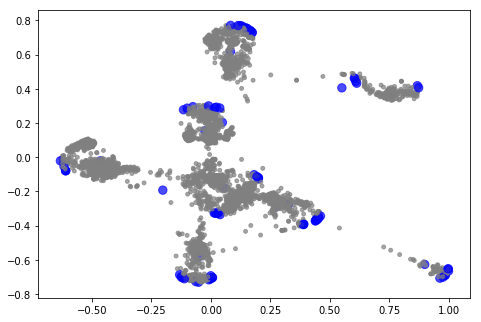

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline


with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    edges = G.edges()
    colors = []
    paint_edges = []
    paint_edges2 = []
    paint_nodes = []
    
    local = list(nx.local_bridges(G, False))
    total = list(nx.bridges(G))
    
    for i in total :
        paint_edges.append(i)
        if i[0] not in paint_nodes :
            paint_nodes.append(i[0])
        if i[1] not in paint_nodes :
            paint_nodes.append(i[1])
            
    for i in local :
        if i not in total :
            if i[0] not in paint_nodes :
                paint_nodes.append(i[0])
            if i[1] not in paint_nodes :
                paint_nodes.append(i[1])
            paint_edges2.append(i)
            
    for u, v in edges :
        if (u, v) in paint_edges :
            colors.append('red')
        elif (u, v) in paint_edges2 :
            colors.append('pink')
        else :
            colors.append('black')
    
    color_map = []
    node_sizes = []
    
    for node in G:
        if node in paint_nodes :
            color_map.append('blue')
            node_sizes.append(70)
        else :
            color_map.append('grey')
            node_sizes.append(15)
        
    nx.draw(G,node_color = color_map, edge_color=colors, node_size = node_sizes, alpha = 0.7)
    plt.show()

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline


with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    betweenness_centrality_nodes = nx.betweenness_centrality(G)
    
    node_sizes = []
    
    for item in betweenness_centrality_nodes.values() :
        node_sizes.append(1000 * item + 15)

    nx.draw(G, node_size = node_sizes, alpha = 0.7, edgecolors = 'black')
    plt.show()


{0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.673274954378314e-06, 42: 0.0, 

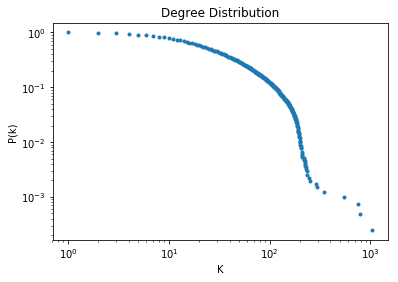

Calculating best minimal value for power law fit
C:\Users\joel.s.almeida\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\joel.s.almeida\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


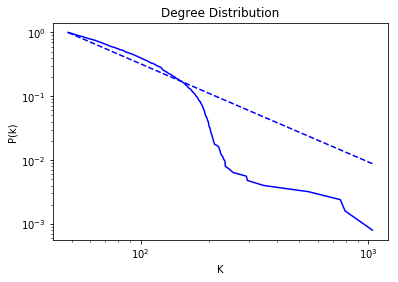

alpha=  2.531484466048424   sigma=  0.04331692204898798    xmin=  48.0   xmax=  None


In [26]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections as col
import powerlaw
import operator

with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
    degreeCount = col.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    cnt_normalized = np.array(cnt) / N
    
    cnt_normalized = np.cumsum(cnt_normalized[::-1])[::-1]
    
    fig, ax = plt.subplots()
    plt.loglog(deg, cnt_normalized, marker='.', linestyle="None")
    
    plt.title("Degree Distribution")
    plt.ylabel("P(k)")
    plt.xlabel("K")
    
    plt.show()
    
    fit = powerlaw.Fit(np.array(degree_sequence)+1,discrete=True)
    fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_ccdf( color= 'b' )
    
    plt.title("Degree Distribution (com corte)")
    plt.ylabel("P(k)")
    plt.xlabel("K")
    
    plt.show()
    print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma, '   xmin= ', fit.power_law.xmin, '  xmax= ', fit.power_law.xmax)
